###  TASK 1

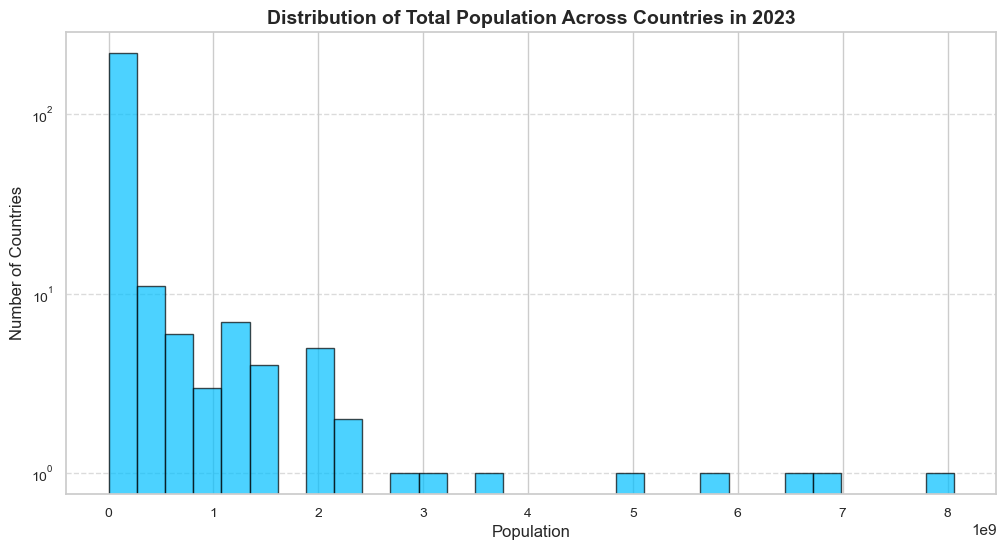

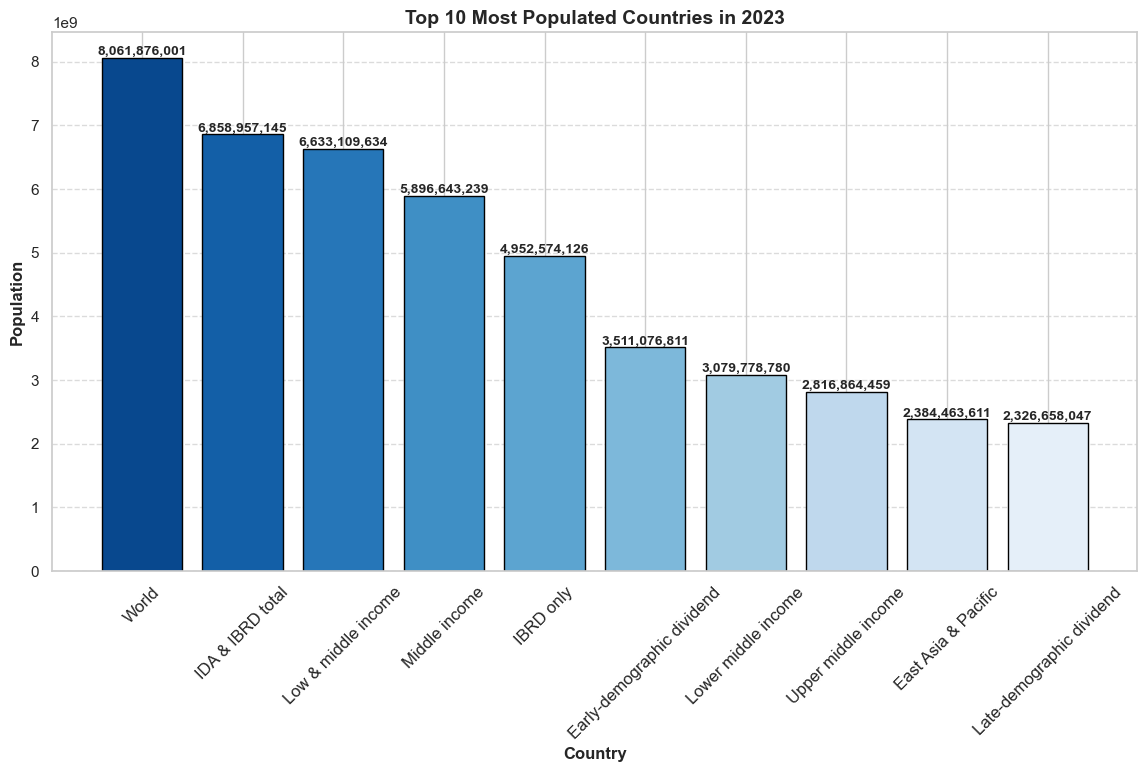

In [1]:
# Step 1: Import important libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply a modern theme
sns.set_theme(style="whitegrid")

# Step 2: Load the data into a pandas DataFrame
file_path = r'C:\Users\Lenovo\Downloads\API_SP.POP.TOTL_DS2_en_csv_v2_26346\API_SP.POP.TOTL_DS2_en_csv_v2_26346.csv'  
df = pd.read_csv(file_path, skiprows=4)

# Step 3: Preprocess the data
year = '2023'  # Specify the year of interest
df = df[['Country Name', year]]
df = df.dropna(subset=[year])  # Remove rows with missing population data
df[year] = pd.to_numeric(df[year], errors='coerce')  # Ensure population data is numeric
df = df.dropna(subset=[year])  # Remove any remaining rows with non-numeric data

# Step 4: Histogram
plt.figure(figsize=(12, 6))
plt.hist(df[year], bins=30, color='deepskyblue', edgecolor='black', alpha=0.7)
plt.title(f'Distribution of Total Population Across Countries in {year}', fontsize=14, fontweight='bold')
plt.xlabel('Population', fontsize=12)
plt.ylabel('Number of Countries', fontsize=12)
plt.yscale('log')  # Use a logarithmic scale for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Step 5: Bar Chart for the Top 10 Most Populated Countries
df_sorted = df.sort_values(by=year, ascending=False)
top_10 = df_sorted.head(10)

plt.figure(figsize=(14, 7))
bars = plt.bar(top_10['Country Name'], top_10[year], color=sns.color_palette("Blues_r", 10), edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:,.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, fontsize=12)
plt.xlabel('Country', fontsize=12, fontweight='bold')
plt.ylabel('Population', fontsize=12, fontweight='bold')
plt.title(f'Top 10 Most Populated Countries in {year}', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()